In [1]:
# Importe les librairies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

# from scipy import stats

<img src='./images/logo-la-poule-qui-chante.png' width=480px />

# Produisez une étude de marché avec Python<br>Partie n°1 : préparation des données

> &#9888; Ce *notebook* est le premier des deux *notebooks* qui vont composer notre étude de marché. Il contient la préparation, le nettoyage et l’analyse exploratoire des données.

Nous sommes en poste chez **La poule qui chante**, une entreprise française d’agroalimentaire qui souhaite se développer à l'international. Cependant, la liste des pays potentiels dans lesquels s'implanter est longue. Pour cela, nous allons réaliser une analyse des groupements de pays que l'on pourra cibler grâce à différentes méthodes de *clustering*, puis nous approfondirons l'étude de marché.

Les données qui vont être utilisées seront toutes issues des [statistiques de la *Food and Agriculture Organization of the United Nations (FAO)*](https://www.fao.org/faostat/fr/#home).
Nous disposons déjà de deux de leurs jeux de données et nous allons récupérer ceux dont nous allons avoir besoin afin d'élargir les critères de l'analyse. Pour définir ces derniers, nous nous inspirons de l'analyse PESTEL. En voici la synthèse.

|Domaine            |Indicateur<sup>[1]</sup>                                                  |Jeu de données                    |
|-------------------|--------------------------------------------------------------------------|----------------------------------|
|**P**olitique      |Stabilité politique et absence de violence/terrorisme (indice)            |Données de la sécurité alimentaire|
|                   |Part des importations de volailles par rapport au total                   |Bilans Alimentaires               |
|**E**conomique     |PIB par habitant US$                                                      |Indicateurs macro                 |
|                   |Croissance annuelle US$                                                   |Indicateurs macro                 |
|**S**ocial         |Croissance moyenne de la population                                       |Séries temporelles et annuelles   |
|                   |Disponibilité alimentaire en quantité                                     |Bilans Alimentaires               |
|**T**echnologique  |Indice de production dans l'élevage                                       |Indices de production             |
|                   |Pourcentage de la population utilisant au moins les services d'eau de base|Données de la sécurité alimentaire|
|**E**nvironnemental|Part de superficie des terres                                             |Utilisation des terres            |
|**L**égal          |Pas d'indicateur disponible sur la FAO                                    |                                  |

*1. Les indicateurs seront donnés pour l'année 2017.*

## Sommaire

* [Préparation des données pour l'analyse](#1)
    * [Importation des *datasets*](#1-1)
    * [Création du *DataFrame* final](#1-2)
    * [Vérification de `df_final`](#1-3)
    * [Exportation de `df_final`](#1-4)
* [Analyse descriptive](#2)
    * [Analyse univariée](#2-1)
    * [Analyse bivariée](#2-2)
* [Exportation de `df_final`](#3)

## Préparation des données pour l'analyse<a id='1'></a>

Nous allons importer chacun des *datasets* nécessaire puis extraire, éventuellement calculer et compiler les indicateurs dans un *DataFrame* final. 

### Importation des *datasest*<a id='1-1'></a>

In [2]:
df_disponibilite = pd.read_csv('./datasets/raw/dispo-alimentaire-2017.csv')
df_disponibilite.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),150,Pays-Bas (Royaume des),5511,Production,F2511,Blé et produits,2017,2017,Milliers de tonnes,1054.0,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),150,Pays-Bas (Royaume des),5611,Importations - Quantité,F2511,Blé et produits,2017,2017,Milliers de tonnes,6792.0,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),150,Pays-Bas (Royaume des),5911,Exportations - Quantité,F2511,Blé et produits,2017,2017,Milliers de tonnes,1609.0,I,Valeur imputée


In [3]:
df_macro = pd.read_csv('./datasets/raw/macro-2017.csv')
df_macro.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,4.865790,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,537.126294,X,Ciffre de sources internationales,NaN


In [4]:
df_population = pd.read_csv('./datasets/raw/population-2000-2018.csv')
df_population.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


In [5]:
df_securite = pd.read_csv('./datasets/raw/securite-2017.csv')
df_securite.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN


In [6]:
# Crée la liste des DataFrames
dfs = ['df_disponibilite', 'df_macro', 'df_population',
       'df_securite']

print(f'DataFrame\t\tDimensions\tNaN')
for df in dfs:
    print(f'{df:<20}\t{eval(df).shape}\t{eval(df).isna().sum().sum()}')

DataFrame		Dimensions	NaN
df_disponibilite    	(71479, 14)	0
df_macro            	(844, 15)	844
df_population       	(4411, 15)	4153
df_securite         	(196, 15)	196


VOIR LES VALEURS NULLES

Les noms des variables comprennent des majuscules, des espaces ou des accents. Pour simplifier la lecture et les manipulations, nous créons une fonction qui va convertir les variables selon la convention *snake case*.

In [7]:
def snake_case (df):
    """Renomme les variables d'un DataFrame selon la convention snake case."""
    df.columns = (
        df.columns
        .str.lower()
        .str.replace('\'', '_')
        .str.replace(' - ', '_')
        .str.replace('-', '_')
        .str.replace(' ', '_')
        .str.normalize('NFKD')
        .str.encode('ascii', errors='ignore')
        .str.decode('utf-8')
    )

On applique ensuite cette fonction à nos jeux de données.

In [8]:
# Applique la fonction 'snake_case' aux DataFrames
for df in dfs:
    snake_case(eval(df))

### Création du *DataFrame* final<a id='1-2'></a>

Avant de commencer à extraire les informations qui nous intéressent au sein de chaque *dataset*, nous allons déterminer celui qui contient le plus de pays. C'est par ce dernier que nous commencerons. Si des pays doivent être retirés à cause d'un nombre de données manquantes trop important, nous le ferons par la suite.

In [9]:
# Affiche le nombre de pays de chaque DataFrame
print('DataFrame\t\tNombre de pays')
for df in dfs:
    print(f'{df:<20}\t{eval(df)["zone"].nunique()}')

DataFrame		Nombre de pays
df_disponibilite    	180
df_macro            	211
df_population       	238
df_securite         	196


C'est le *DataFrame* de la population qui contient le plus de données. Ce sera notre point de départ avant d'ajouter les autres indicateurs au fûr et à mesure.

#### `df_population`

In [10]:
df_population.head(3)

,code_domaine,domaine,code_zone,zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


Ajout de l'évolution démographique : calcul de l'évolution moyenne sur la période 2010-2017.

In [11]:
# Crée le DataFrame final à partir de celui de la population
df_final = df_population.copy()

# Pivote 'code_zone' et 'zone'
df_final = df_final.pivot_table(
    index='annee', columns=['code_zone', 'zone'],values='valeur')

# Complète les valeurs des années manquantes par celles de la ligne précédente
df_final = df_final.fillna(method='bfill', axis='rows')

# Calcule l'écart en pourcentage entre deux lignes
df_final = df_final.pct_change()

# Calcule la moyenne de chaque colonne
df_final = (
    (df_final.mean()*100).round(2)
    .to_frame(name='evolution_population_%')
    .reset_index()
)

df_final.head(3)

,code_zone,zone,evolution_population_%
0,1,Arménie,-0.22
1,2,Afghanistan,3.29
2,3,Albanie,-0.45


#### `df_disponibilite`

In [12]:
df_disponibilite.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit_(cpc),produit,code_annee,annee,unite,valeur,symbole,description_du_symbole
0,FBS,Bilans Alimentaires (2010-),150,Pays-Bas (Royaume des),5511,Production,F2511,Blé et produits,2017,2017,Milliers de tonnes,1054.0,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),150,Pays-Bas (Royaume des),5611,Importations - Quantité,F2511,Blé et produits,2017,2017,Milliers de tonnes,6792.0,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),150,Pays-Bas (Royaume des),5911,Exportations - Quantité,F2511,Blé et produits,2017,2017,Milliers de tonnes,1609.0,I,Valeur imputée


1. Ajout de la part de consommation de poulet.

Nous souhaitons récupérer la disponibilité de poulet, hors tous les produits sont présents dans nos données. Nous allons donc chercher le nom de produit qui correspond au poulet.

In [13]:
df_disponibilite.loc[
    df_disponibilite['produit'].str.contains('poulet|volaille|dinde', case=False
    )]['produit'].unique()

array(['Viande de Volailles'], dtype=object)

On peut maintenant ajouter la part de consommation de viande de volailles à notre *dataset* final.

In [14]:
# Crée un DataFrame temporaire en filtrant 'element'
df_temp = df_disponibilite.loc[df_disponibilite['element'] == 'Nourriture']

# Pivote 'produit'
df_temp = df_temp.pivot_table(
    index='code_zone_(fao)', columns='produit', values='valeur'
)

# Calcul la part de consommation de volaille
df_temp['part_conso_volailles_%'] = (df_temp['Viande de Volailles'] 
                                    / df_temp.sum(axis='columns')*100)

# Réinitialise l'index
df_temp = df_temp.reset_index().rename_axis(None, axis='columns')

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone_(fao)', 'part_conso_volailles_%']],
    how='left',
    left_on='code_zone',
    right_on='code_zone_(fao)'
).drop(columns='code_zone_(fao)')

del df_temp

df_final.head(3)

,code_zone,zone,evolution_population_%,part_conso_volailles_%
0,1,Arménie,-0.22,1.488499
1,2,Afghanistan,3.29,0.448368
2,3,Albanie,-0.45,0.979548


2. Ajout des importations de volailles.

In [15]:
# Crée un DataFrame temporaire en filtrant 'element' et 'produit'
df_temp = df_disponibilite.loc[
    (df_disponibilite['element'] == 'Importations - Quantité')
    & (df_disponibilite['produit'] == 'Viande de Volailles')
]

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone_(fao)', 'valeur']],
    how='left',
    left_on='code_zone',
    right_on='code_zone_(fao)'
).drop(columns='code_zone_(fao)')

# Renomme la variable 'valeur'
df_final = df_final.rename(
    columns={'valeur': 'importations_volailles_kt'})

del df_temp

df_final.head(3)

,code_zone,zone,evolution_population_%,part_conso_volailles_%,importations_volailles_kt
0,1,Arménie,-0.22,1.488499,35.0
1,2,Afghanistan,3.29,0.448368,29.0
2,3,Albanie,-0.45,0.979548,20.0


3. Ajout du taux d'autosuffisance (TAS).

Cette indicateur se calcule de la manière suivante :

* $TAS = \frac{Production}{Production + Importations - Exportations}\times100$

In [16]:
# Crée un DataFrame temporaire en filtrant 'produit'
df_temp = df_disponibilite.loc[
    df_disponibilite['produit'] == 'Viande de Volailles']

# Pivote 'element'
df_temp =  df_disponibilite.pivot_table(
    index='code_zone_(fao)', columns='element', values='valeur'
).reset_index().rename_axis(None, axis='columns')

# Calcul le taux d'autosuffisance
df_temp['tas_volailles_%'] = (
    df_temp['Production']
    / (df_temp['Production']
       + df_temp['Importations - Quantité']
       - df_temp['Exportations - Quantité']) * 100
)

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone_(fao)', 'tas_volailles_%']],
    how='left',
    left_on='code_zone',
    right_on='code_zone_(fao)'
).drop(columns='code_zone_(fao)')

del df_temp

df_final.head(3)

,code_zone,zone,evolution_population_%,part_conso_volailles_%,importations_volailles_kt,tas_volailles_%
0,1,Arménie,-0.22,1.488499,35.0,93.696200
1,2,Afghanistan,3.29,0.448368,29.0,81.869816
2,3,Albanie,-0.45,0.979548,20.0,92.144814


#### `df_macro`

In [19]:
df_macro.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,4.865790,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,537.126294,X,Ciffre de sources internationales,NaN


Ajout du taux de croissance et du revenu par habitant.

In [20]:
# Crée un DataFrame temporaire en filtrant 'element' et 'produit'
df_temp = df_macro.loc[
    (
        (df_macro['element'] == 'Croissance annuelle US$')
        & (df_macro['produit'] == 'Produit Intérieur Brut')
    )
    | (
        (df_macro['element'] == 'Valeur US $ par habitant')
        & (df_macro['produit'] == 'Revenu national brut')
    )
]

# Pivote 'element'
df_temp =  df_temp.pivot_table(
    index='code_zone_(fao)', columns='element', values='valeur'
).reset_index().rename_axis(None, axis='columns')

# Ajoute les variables à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone_(fao)', 'Croissance annuelle US$',
             'Valeur US $ par habitant']],
    how='left',
    left_on='code_zone',
    right_on='code_zone_(fao)'
).drop(columns='code_zone_(fao)')

# Renomme les variables
df_final = df_final.rename(
    columns={'Croissance annuelle US$': 'croissance_annuelle_%',
             'Valeur US $ par habitant': 'revenu_par_habitant_usd'}
)

del df_temp

df_final.head(3)

,code_zone,zone,evolution_population_%,part_conso_volailles_%,importations_volailles_kt,tas_volailles_%,croissance_annuelle_%,revenu_par_habitant_usd
0,1,Arménie,-0.22,1.488499,35.0,93.696200,9.305043,4184.835842
1,2,Afghanistan,3.29,0.448368,29.0,81.869816,4.865790,537.126294
2,3,Albanie,-0.45,0.979548,20.0,92.144814,9.765944,4532.791976


#### `df_securite`

In [23]:
df_securite.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN


On commence par pivoter les produits qui sont les variables dont nous allons avoir besoin.

In [24]:
df_securite.pivot_table(
    index='code_zone_(fao)', columns='produit', values='valeur'
).reset_index().rename_axis(None, axis='columns')

,code_zone_(fao),Stabilité politique et absence de violence/terrorisme (indice)
0,1,-0.62
1,2,-2.80
2,3,0.38
3,4,-0.92
4,5,1.22
...,...,...
191,272,0.09
192,273,-0.06
193,276,-1.98
194,277,-2.45


In [25]:
# Crée un DataFrame temporaire en pivotant 'element'
df_temp = df_securite.pivot_table(
    index='code_zone_(fao)', columns='produit', values='valeur'
).reset_index().rename_axis(None, axis='columns')

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone_(fao)',
             'Stabilité politique et absence de violence/terrorisme (indice)']],
    how='left',
    left_on='code_zone',
    right_on='code_zone_(fao)'
).drop(columns='code_zone_(fao)')

# Renomme la variable 'valeur'
df_final = df_final.rename(
    columns={'Stabilité politique et absence de violence/terrorisme (indice)':
             'indice_stabilite_politique'}
)

del df_temp

df_final.head(3)

,code_zone,zone,evolution_population_%,part_conso_volailles_%,importations_volailles_kt,tas_volailles_%,croissance_annuelle_%,revenu_par_habitant_usd,indice_stabilite_politique
0,1,Arménie,-0.22,1.488499,35.0,93.696200,9.305043,4184.835842,-0.62
1,2,Afghanistan,3.29,0.448368,29.0,81.869816,4.865790,537.126294,-2.80
2,3,Albanie,-0.45,0.979548,20.0,92.144814,9.765944,4532.791976,0.38


#### `df_utilisation`

In [27]:
# df_utilisation.head(3)

Ajout de la part de superficie des terres agricoles.

In [28]:
# # Crée un DataFrame temporaire en pivotant les variables
# df_temp =  df_utilisation.pivot_table(
#     index='code_zone_(fao)', values='valeur'
# ).reset_index().rename_axis(None, axis='columns')

# # Ajoute la variable à 'df_final'
# df_final = pd.merge(
#     df_final,
#     df_temp[['code_zone_(fao)', 'valeur']],
#     how='left',
#     left_on='code_zone',
#     right_on='code_zone_(fao)'
# ).drop(columns='code_zone_(fao)')

# # Renomme la variable 'valeur'
# df_final = df_final.rename(
#     columns={'valeur': 'part_terres_agricoles_%'})

# del df_temp

# df_final.head(3)

Nos *DataFrames* source ne sont plus nécessaires. On les supprime.

In [29]:
del (dfs, df, df_disponibilite, df_macro, df_population, df_securite)

### Vérification de `df_final`<a id='1-3'></a>

#### Aperçu des données

In [30]:
df_final.head()

,code_zone,zone,evolution_population_%,part_conso_volailles_%,importations_volailles_kt,tas_volailles_%,croissance_annuelle_%,revenu_par_habitant_usd,indice_stabilite_politique
0,1,Arménie,-0.22,1.488499,35.0,93.696200,9.305043,4184.835842,-0.62
1,2,Afghanistan,3.29,0.448368,29.0,81.869816,4.865790,537.126294,-2.80
2,3,Albanie,-0.45,0.979548,20.0,92.144814,9.765944,4532.791976,0.38
3,4,Algérie,1.72,0.923962,2.0,68.879152,6.287893,4081.775086,-0.92
4,5,Samoa américaines,-0.23,NaN,NaN,NaN,NaN,NaN,1.22


In [31]:
print(f'Dimensions du DataFrame: {df_final.shape}')

Dimensions du DataFrame: (238, 9)


On supprime le code des zones qui ne sera plus utile.

In [32]:
df_final = df_final.drop(columns='code_zone')

#### Type des données

In [33]:
df_final.dtypes

zone                           object
evolution_population_%        float64
part_conso_volailles_%        float64
importations_volailles_kt     float64
tas_volailles_%               float64
croissance_annuelle_%         float64
revenu_par_habitant_usd       float64
indice_stabilite_politique    float64
dtype: object

Le type des données est correct.

#### Doublons

In [34]:
print('Nombre de doublons dans le DataFrame :', df_final.duplicated().sum())

Nombre de doublons dans le DataFrame : 0


#### Valeurs manquantes

In [35]:
df_final.isna().sum()

zone                           0
evolution_population_%         0
part_conso_volailles_%        59
importations_volailles_kt     60
tas_volailles_%               59
croissance_annuelle_%         28
revenu_par_habitant_usd       28
indice_stabilite_politique    42
dtype: int64

Dans un premier temps, nous allons supprimer les enregistrements qui ont un nombre de valeurs manquantes supérieur ou égal à 5 (sur 7 indicateurs). Au préalable, nous sauvegardons la liste des zones pour pouvoir la comparer avec celle après nettoyage.

In [36]:
# Crée la liste initiale des zones
liste_initiale_zones = set(df_final['zone'].unique())

# Supprime les zones avec NaN >= 5
df_final = (
    df_final[df_final.isna().sum(axis='columns') < 5]).reset_index(drop=True)

df_final.isna().sum()

zone                           0
evolution_population_%         0
part_conso_volailles_%        32
importations_volailles_kt     33
tas_volailles_%               32
croissance_annuelle_%          1
revenu_par_habitant_usd        1
indice_stabilite_politique    16
dtype: int64

Dans un second temps, nous complétons `part_conso_volailles_%`, `importations_volailles_kt` et `tas_volailles_%` par les valeurs médianes du jeu de données.

In [37]:
cols = ['part_conso_volailles_%', 'importations_volailles_kt',
        'tas_volailles_%', 'indice_stabilite_politique']

for col in cols:
    df_final[col] = df_final[col].fillna(df_final[col].median())

del col, cols

df_final.isna().sum()

zone                          0
evolution_population_%        0
part_conso_volailles_%        0
importations_volailles_kt     0
tas_volailles_%               0
croissance_annuelle_%         1
revenu_par_habitant_usd       1
indice_stabilite_politique    0
dtype: int64

Il ne reste qu'un enregistrement à traiter, affichons le pays concernés.

In [38]:
df_final.loc[df_final.isna().any(axis='columns')]

,zone,evolution_population_%,part_conso_volailles_%,importations_volailles_kt,tas_volailles_%,croissance_annuelle_%,revenu_par_habitant_usd,indice_stabilite_politique
174,"Chine, Taiwan Province de",0.43,5.331486,161.0,56.780967,NaN,NaN,0.03


Nous allons imputer directement les valeurs à partir de données trouvées dans une note de synthèse du gouvernement français.

In [39]:
df_final.loc[174, 'croissance_annuelle_%'] = 3.08
df_final.loc[174, 'revenu_par_habitant_usd'] = 22698

In [40]:
# RAZ de l'index de 'df_final'
df_final = df_final.reset_index(drop=True)

Le traitement des valeurs manquantes étant terminer, nous allons vérifier la liste des zones supprimées.

In [41]:
# Crée la liste des zones après traitement
liste_finales_zones = set(df_final['zone'].unique())

# Crée la liste des zones supprimées
liste_zones_supprimees = liste_initiale_zones - liste_finales_zones

# Affiche la liste des zones supprimées
print(liste_zones_supprimees)

{'Îles Mariannes du Nord', 'Îles Féroé', 'Serbie-et-Monténégro', 'Nioué', 'Gibraltar', 'Îles Falkland (Malvinas)', 'Mayotte', 'Martinique', 'Saint-Siège', 'Saint-Barthélemy', 'Bonaire, Saint-Eustache et Saba', 'Antilles néerlandaises (ex)', 'Saint-Martin (partie française)', 'Sainte-Hélène, Ascension et Tristan da Cunha', 'Îles Anglo-Normandes', 'Saint-Pierre-et-Miquelon', 'Sahara occidental', 'Îles Wallis-et-Futuna', 'Réunion', 'Samoa américaines', 'Tokélaou', 'Îles Vierges américaines', 'Île de Man', 'Soudan (ex)', 'Guyane française', 'Guadeloupe', 'Guam'}


On remarque que nous avons essentiellement supprimé des îles ou des régions appartenant à d'autres pays.

In [42]:
del liste_initiale_zones, liste_finales_zones, liste_zones_supprimees

## Analyse descriptive<a id='2'></a>

### Analyse univariée<a id='2-1'></a>

In [43]:
# Affiche le nombre de pays
print(f'Nombre de pays dans le jeu de données : {df_final.zone.nunique()}')

# Affiche le nombre d'indicateurs
print(f'Nombre d\'indicateurs : {(len(df_final.columns) - 1)}')

Nombre de pays dans le jeu de données : 211
Nombre d'indicateurs : 7


Nous pouvons créer une liste de nos indicateurs qui nous permettra nous aidera par la suite à tracer nos représentations graphiques

In [44]:
# Crée la liste des indicateurs
indicateurs = (list(df_final.columns))
indicateurs.remove('zone')

In [45]:
# Affiche la description des variables quantitatives
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
evolution_population_%,211.0,1.411991,1.345583,-1.230000,0.470000,1.250000,2.270000,9.110000
part_conso_volailles_%,211.0,2.904313,2.305629,0.090686,1.392572,2.341613,3.597528,12.458472
importations_volailles_kt,211.0,74.421801,168.957863,0.000000,5.000000,16.000000,57.500000,1069.000000
tas_volailles_%,211.0,20.341483,1141.652842,-16444.206009,86.519625,93.748459,100.870004,1165.739375
croissance_annuelle_%,211.0,7.069815,7.541745,-27.928307,4.390064,7.260694,9.941225,36.133401
revenu_par_habitant_usd,211.0,16442.455916,24804.617018,295.780939,2015.642986,6339.886355,19806.127104,178117.963683
indice_stabilite_politique,211.0,-0.065261,0.955217,-2.940000,-0.625000,0.030000,0.655000,1.920000


On remarque un soucis sur les valeurs minimales et maximales de `tas_volailles_%`. Voyons à quelle pays cela correspond.

In [46]:
df_final.nsmallest(5, 'tas_volailles_%')

,zone,evolution_population_%,part_conso_volailles_%,importations_volailles_kt,tas_volailles_%,croissance_annuelle_%,revenu_par_habitant_usd,indice_stabilite_politique
108,Maldives,3.47,2.823491,12.0,-16444.206009,8.564508,9268.018455,0.23
159,Seychelles,1.01,6.007810,3.0,-105.786319,4.853478,13916.512646,0.79
104,Chine - RAS de Macao,2.19,4.510503,23.0,12.614096,11.914871,70300.937271,1.43
73,Chine - RAS de Hong-Kong,0.61,6.185678,907.0,13.039694,6.361267,47724.637597,0.83
57,Djibouti,1.62,0.710093,3.0,18.203544,5.662606,2778.467670,-0.74


In [47]:
df_final.nlargest(5, 'tas_volailles_%')

,zone,evolution_population_%,part_conso_volailles_%,importations_volailles_kt,tas_volailles_%,croissance_annuelle_%,revenu_par_habitant_usd,indice_stabilite_politique
111,Mauritanie,2.90,1.135630,24.0,1165.739375,6.272922,1611.405907,-0.63
64,Kiribati,1.78,3.238866,1.0,266.048459,5.426179,2984.736961,0.88
76,Islande,1.02,3.268081,2.0,224.203490,18.925049,72312.699778,1.35
191,Uruguay,0.21,1.260468,3.0,197.677149,12.225233,17886.932041,1.05
128,Nouvelle-Zélande,1.15,3.398297,1.0,151.048054,9.418329,41898.140322,1.60


Nous avons deux pays avec des valeurs négatives dont une extrêment aberrante et même improbable. Nous remplaçons leur valeur par la valeur moyenne.

In [48]:
# Remplace les valeurs aberrantes de 'tas_volailles_%' par la moyenne
df_final.loc[108, 'tas_volailles_%'] = df_final['tas_volailles_%'].mean()
df_final.loc[159, 'tas_volailles_%'] = df_final['tas_volailles_%'].mean()

La Mauritanie a un TAS bien plus élevé que le reste du jeu de données alors que la valeur de ses autres indicateurs, et notamment de sa consommation et de ses importations, n'ont rien d'aberrantes. Nous décidons de corriger cette valeur en la remplaçant par la deuxième valeur la plus forte.

In [49]:
df_final.loc[111, 'tas_volailles_%'] = df_final.loc[64, 'tas_volailles_%']

#### Distribution des indicateurs

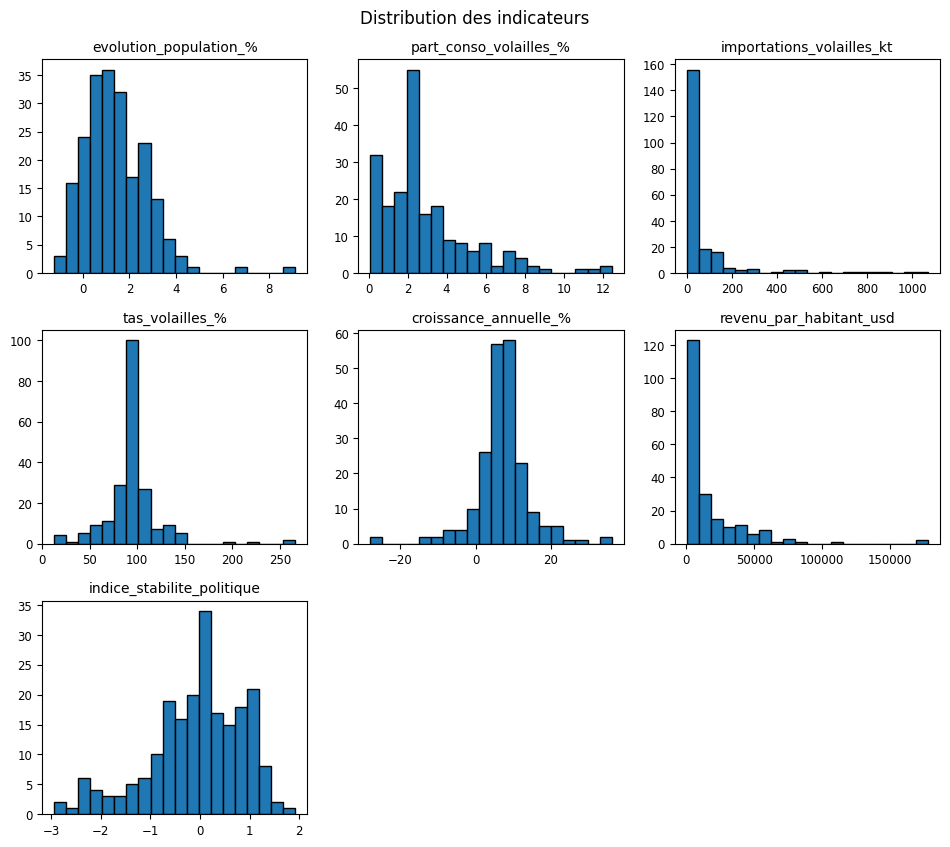

In [50]:
# Initialise le graphique
fig, axs = plt.subplots(3, 3, figsize=(9.6, 8.6))

# Trace l'histogramme pour chaque variable
for i, indicateur in enumerate(indicateurs):
    r = np.floor(i/3).astype(int)
    c = i % 3
    axs[r, c].hist(indicateur, data=df_final, edgecolor='k', bins=20)
    axs[r, c].set_title(f'{indicateur}', size=10)
    axs[r, c].tick_params(axis='both', which='both', labelsize=8.5)

# Supprime les graphiques vides
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Distribution des indicateurs')

plt.tight_layout()

plt.show()

del fig, axs, i, r, c

#### Dispersion des indicateurs

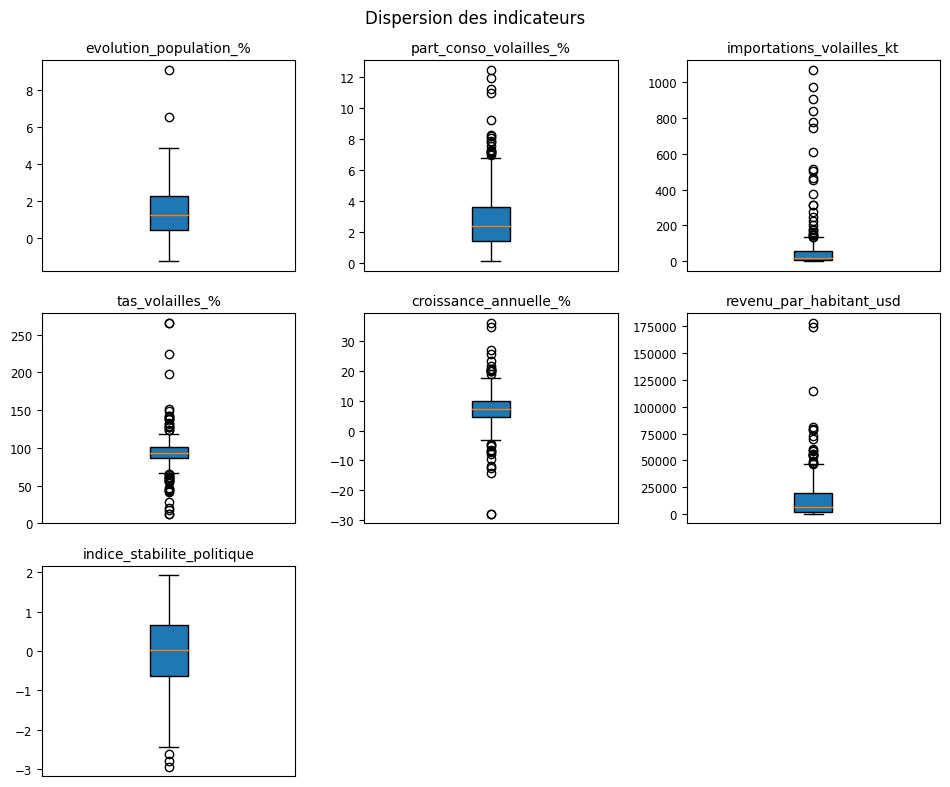

In [51]:
# Initialise le graphique
fig, axs = plt.subplots(3, 3, figsize=(9.6, 8))

# Trace l'histogramme pour chaque variable
for i, indicateur in enumerate(indicateurs):
    r = np.floor(i/3).astype(int)
    c = i % 3
    axs[r, c].boxplot(indicateur, data=df_final, patch_artist=True)
    axs[r, c].set_title(f'{indicateur}', size=10)
    axs[r, c].xaxis.set_major_locator(plt.NullLocator())
    axs[r, c].tick_params(axis='y', which='both', labelsize=8.5)

# Supprime les graphiques vides
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Dispersion des indicateurs')

plt.tight_layout()

plt.show()

del fig, axs, i, indicateur, r, c

On remarque que certains indicateurs ont un nombre d'*ouliers* signicatif, affichons les zones concernées.

In [52]:
df_final.columns

Index(['zone', 'evolution_population_%', 'part_conso_volailles_%',
       'importations_volailles_kt', 'tas_volailles_%', 'croissance_annuelle_%',
       'revenu_par_habitant_usd', 'indice_stabilite_politique'],
      dtype='object')

In [53]:
df_final[['zone', 'part_conso_volailles_%']].nlargest(
    5, 'part_conso_volailles_%')

,zone,part_conso_volailles_%
152,Saint-Kitts-et-Nevis,12.458472
179,Trinité-et-Tobago,11.911027
154,Saint-Vincent-et-les Grenadines,11.245432
153,Sainte-Lucie,10.981332
6,Antigua-et-Barbuda,9.209799


In [54]:
df_final[['zone', 'importations_volailles_kt']].nlargest(
    5, 'importations_volailles_kt')

,zone,importations_volailles_kt
87,Japon,1069.0
113,Mexique,972.0
73,Chine - RAS de Hong-Kong,907.0
61,Allemagne,842.0
187,Royaume-Uni de Grande-Bretagne et d'Irlande du...,779.0


In [55]:
df_final[['zone', 'revenu_par_habitant_usd']].nlargest(
    5, 'revenu_par_habitant_usd')

,zone,revenu_par_habitant_usd
101,Liechtenstein,178117.963683
114,Monaco,173611.814788
14,Bermudes,114601.928092
171,Suisse,81118.449926
202,Luxembourg,78873.811060


In [56]:
df_final[['zone', 'tas_volailles_%']].nlargest(
    5, 'tas_volailles_%')

,zone,tas_volailles_%
64,Kiribati,266.048459
111,Mauritanie,266.048459
76,Islande,224.203490
191,Uruguay,197.677149
128,Nouvelle-Zélande,151.048054


In [57]:
df_final[['zone', 'tas_volailles_%']].nsmallest(
    5, 'tas_volailles_%')

,zone,tas_volailles_%
104,Chine - RAS de Macao,12.614096
73,Chine - RAS de Hong-Kong,13.039694
57,Djibouti,18.203544
108,Maldives,20.341483
184,Émirats arabes unis,28.791367


In [58]:
df_final[['zone', 'croissance_annuelle_%']].nlargest(
    5, 'croissance_annuelle_%')

,zone,croissance_annuelle_%
206,Soudan,36.133401
100,Libye,34.551485
172,République arabe syrienne,27.042528
106,Malawi,25.544370
151,Fédération de Russie,23.293875


In [59]:
df_final[['zone', 'croissance_annuelle_%']].nsmallest(
    5, 'croissance_annuelle_%')

,zone,croissance_annuelle_%
192,Ouzbékistan,-27.928307
49,Égypte,-27.795932
193,Venezuela (République bolivarienne du),-14.069328
145,Érythrée,-12.409467
203,Anguilla,-11.826220


### Analyse bivariée<a id='2-2'></a>

#### Matrice de corrélation

Commençons par calculer les corrélations entres nos variables.

In [60]:
correlation_matrix = df_final.corr(numeric_only=True)
correlation_matrix.style.format('{:.2f}')

,evolution_population_%,part_conso_volailles_%,importations_volailles_kt,tas_volailles_%,croissance_annuelle_%,revenu_par_habitant_usd,indice_stabilite_politique
evolution_population_%,1.00,-0.14,-0.06,-0.14,-0.06,-0.10,-0.31
part_conso_volailles_%,-0.14,1.00,0.13,-0.16,-0.05,0.12,0.29
importations_volailles_kt,-0.06,0.13,1.00,-0.19,-0.01,0.16,0.07
tas_volailles_%,-0.14,-0.16,-0.19,1.00,0.12,-0.04,0.10
croissance_annuelle_%,-0.06,-0.05,-0.01,0.12,1.00,-0.10,-0.05
revenu_par_habitant_usd,-0.10,0.12,0.16,-0.04,-0.10,1.00,0.41
indice_stabilite_politique,-0.31,0.29,0.07,0.10,-0.05,0.41,1.00


Puis représentons-la sous forme graphique.

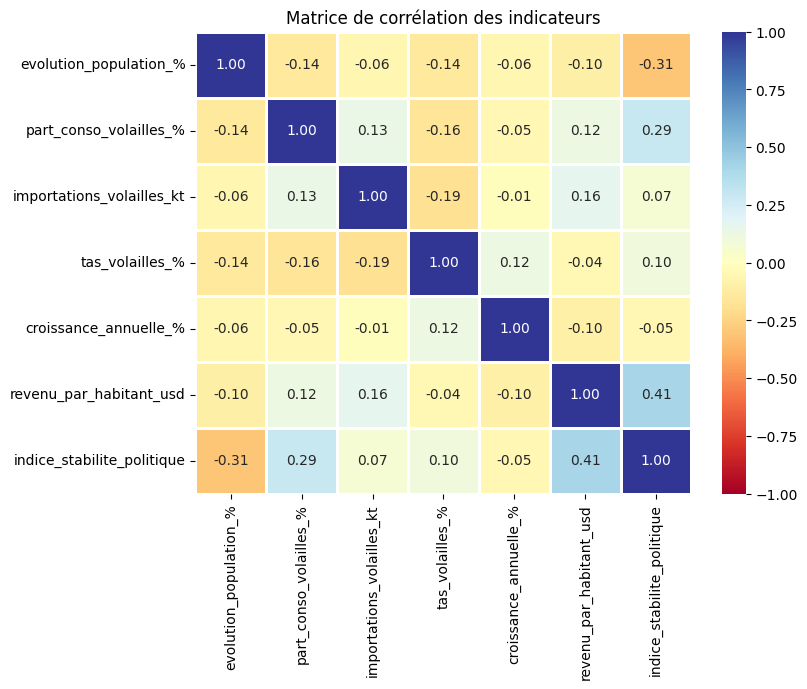

In [61]:
# Initialise le graphique
fig, ax = plt.subplots(figsize=(8, 6))

# Trace la matrice
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1,
annot_kws=None, linewidths=1, cmap='RdYlBu', ax=ax)

ax.set_title('Matrice de corrélation des indicateurs')

plt.show()

del fig, ax

#### Relations variables quantitatives

Traçons les relations entre variables ayant les valeurs de corrélations les plus significatives. Pour cela, et afin d'automatiser la sélection des variables, nous créons une fonction qui permet de ne tracer que les paires de variables qui nous intéressent.

In [62]:
def filtered_pairplot(df, corr_value, ncols=3):
    """
    Trace les paires de variables en les filtrant à partir des coefficients de
    corrélation calculés dans la matrice de corrélation.
    Paramètres :
    - df : DataFrame source.
    - corr_value : valeur de corrélation minimale pour tracer la paire.
    - ncols : nombre de colonne du graphique.
    """

    # Calcule la matrice de corrélation et pivote les colonnes
    df_temp = df.corr(numeric_only=True).unstack().reset_index()

    # Renomme les colonnes
    df_temp = df_temp.rename(
        columns={'level_0': 'var_0', 'level_1': 'var_1', 0: 'value'})
    
    # Sélectionne les lignes ayant une valeur absolue supérieure à 'corr_value'
    df_temp = df_temp.loc[(np.abs(df_temp['value']) >= corr_value)
                          & (np.abs(df_temp['value']) != 1)]
    
    # Supprime les doublons
    df_temp = df_temp.drop_duplicates(subset='value')

    # Détermine le nombre de lignes de graphiques à créer
    nrows = np.ceil(len(df_temp) / ncols).astype(int)

    # Initialise le graphique
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                            figsize=((ncols*3), (2*nrows+2)))
    
    # Boucle sur les lignes du DataFrame
    for i, row in enumerate(df_temp.itertuples()):

        # Calcul la position du graphique
        r = np.floor(i/ncols).astype(int)
        c = i % ncols

        # Trace les graphiques
        axs[r, c].scatter(df[row.var_0], df[row.var_1], edgecolors='w')
        axs[r, c].set_xlabel(f'{row.var_0}', size=9)
        axs[r, c].set_ylabel(f'{row.var_1}', size=9)
        axs[r, c].tick_params(axis='both', which='both', labelsize=8.5)
    
    # Supprime les graphiques vides
    [fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

    fig.suptitle(
        f'Paires de variables avec coefficient de corrélation ≤ -{corr_value}' 
        f'et ≥ +{corr_value}'
        , y=1.02)
      
    fig.tight_layout()

    plt.show()

On peut ensuite tracer nos graphiques.

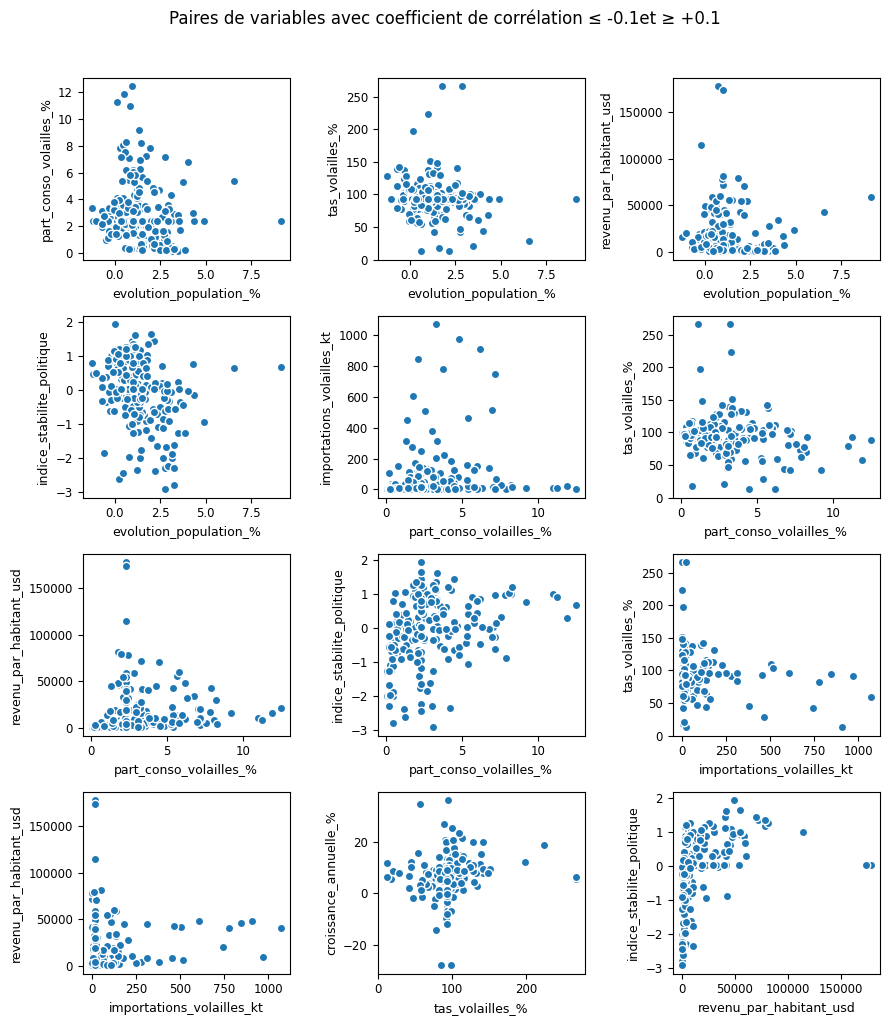

In [63]:
filtered_pairplot(df_final, 0.1)

### Exportation de `df_final`<a id='3'></a>

In [64]:
df_final.to_csv('./datasets/indicateurs-zones-2017.csv', index=False)